In [221]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, chi2
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.simplefilter('ignore')


In [138]:
#Reading the first five rows
df=pd.read_csv("/content/drive/MyDrive/adult.data", names=['age', 'workclass', 'fnlwgt', 'education', 'education_num', 
                                      'marital_status', 'occupation', 'relationship', 'race', 'sex', 
                                      'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [139]:
#To know more about data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [140]:
#To know some statistical measurements
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [141]:
# checking the no of rows and columns
df.shape

(32561, 15)

In [142]:
#checking the unique values for income
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [143]:
#checking the unique values for sex
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [144]:
#Checking the null values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [145]:
#checking the '?' in dataset
df.isin(['?']).sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [146]:
#To check the correlation
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


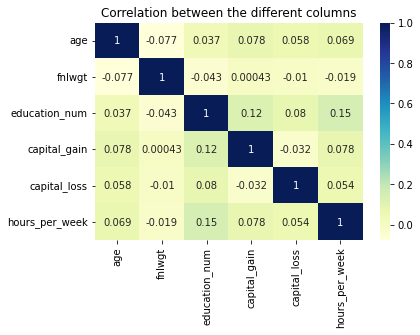

In [147]:
# To plot the correlation
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True)
plt.title("Correlation between the different columns")
plt.show()

In [148]:
# Checking the skewness in dataset
df.skew()

age                0.558743
fnlwgt             1.446980
education_num     -0.311676
capital_gain      11.953848
capital_loss       4.594629
hours_per_week     0.227643
dtype: float64

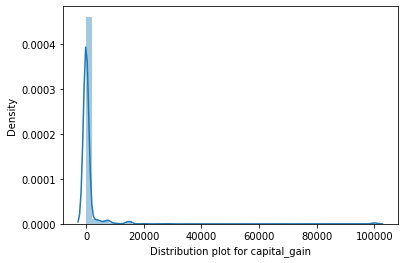

In [149]:
#Distribution plot for capital_gain
sns.distplot(df['capital_gain'])
plt.xlabel("Distribution plot for capital_gain")
plt.show()

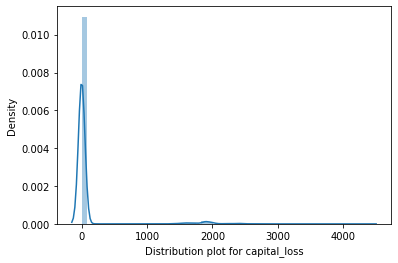

In [150]:
#Distribution plot for capital_loss
sns.distplot(df['capital_loss'])
plt.xlabel("Distribution plot for capital_loss")
plt.show()

In [151]:
# Performing log transformation on 'capital_loss_log' and 'age_log'
capital_loss_log = np.log(df['capital_loss'])
capital_gain_log = np.log(df['capital_gain'])


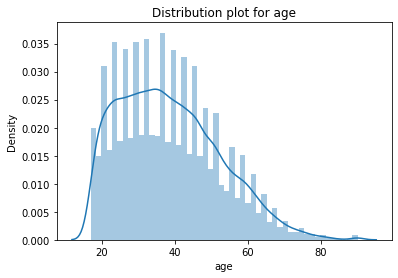

In [152]:
#Distribution plot for age
sns.distplot(df['age'])
plt.title("Distribution plot for age")
plt.show()

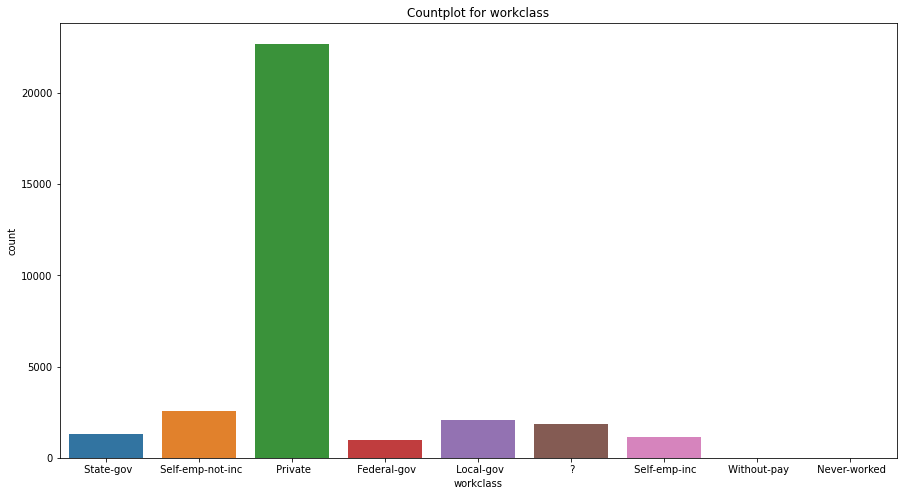

In [153]:
#Countplot for workclass
plt.figure(figsize = (15,8))
sns.countplot(df['workclass'])
plt.title("Countplot for workclass")
plt.show()



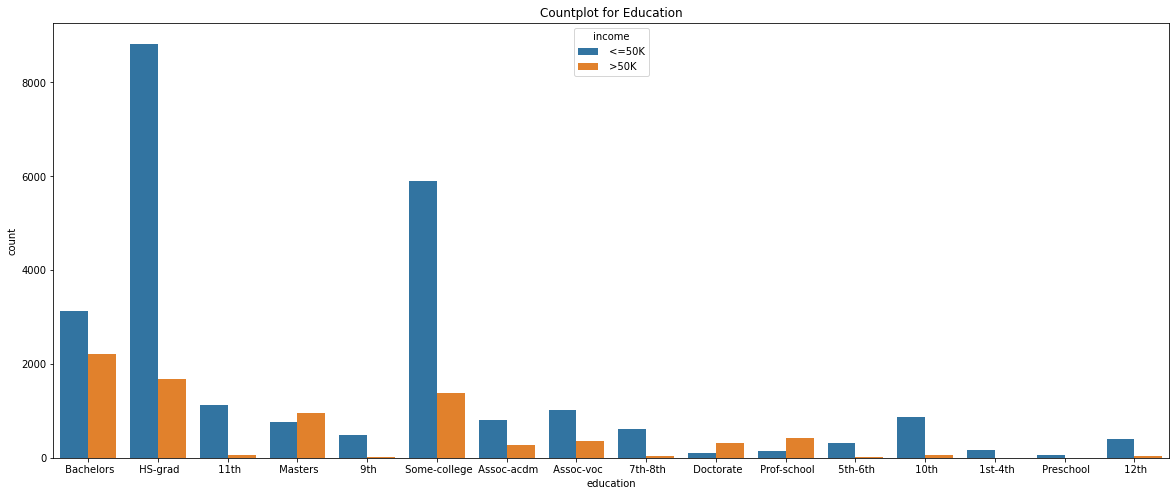

In [154]:
#Countplot for Education
plt.figure(figsize = (20,8))
sns.countplot(x= 'education', hue = 'income', data=df)
plt.title("Countplot for Education")
plt.show()

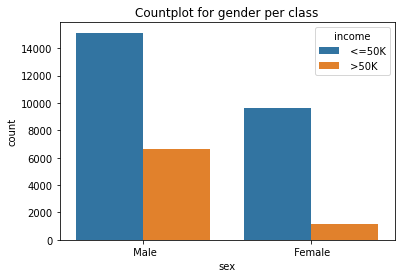

In [155]:
#Countplot for gender per class
sns.countplot(x='sex', hue='income', data=df)
plt.title("Countplot for gender per class")
plt.show()

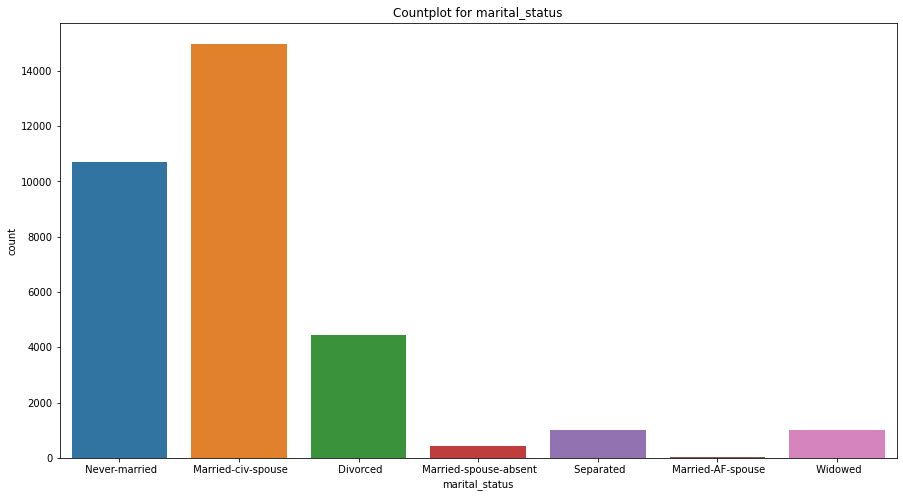

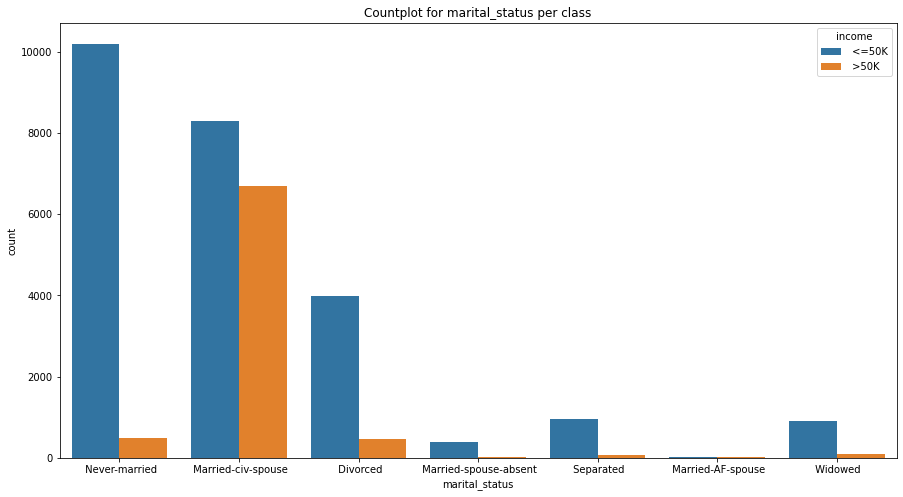

In [156]:
plt.figure(figsize = (15,8))
sns.countplot(df['marital_status'])
plt.title("Countplot for marital_status")
plt.show()


plt.figure(figsize = (15,8))
sns.countplot(x = 'marital_status', hue = 'income', data=df)
plt.title("Countplot for marital_status per class")
plt.show()


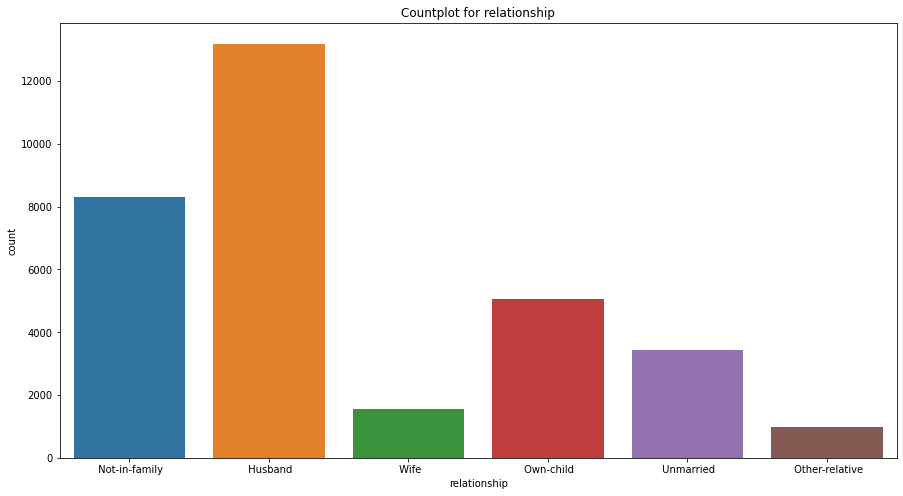

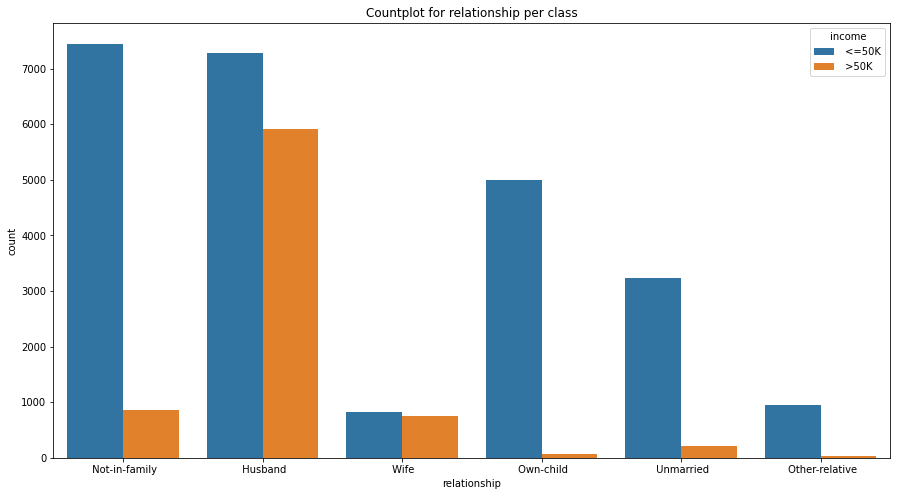

In [157]:
plt.figure(figsize = (15,8))
sns.countplot(df['relationship'])
plt.title("Countplot for relationship")
plt.show()


plt.figure(figsize = (15,8))
sns.countplot(x = 'relationship', hue = 'income', data=df)
plt.title("Countplot for relationship per class")
plt.show()


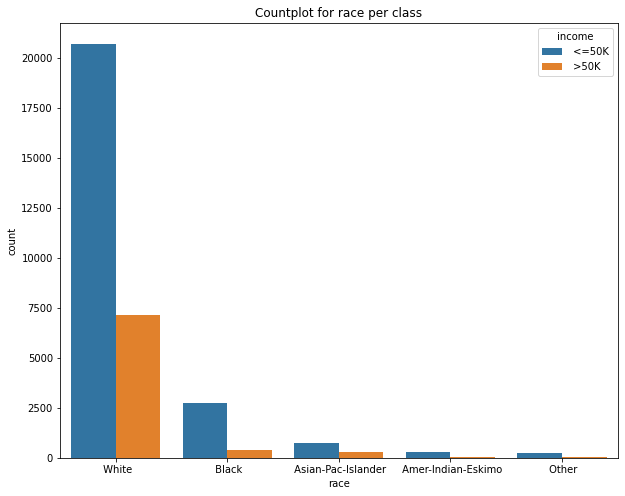

In [158]:
plt.figure(figsize = (10,8))
sns.countplot(x= 'race', hue = 'income', data=df)
plt.title("Countplot for race per class")
plt.show()


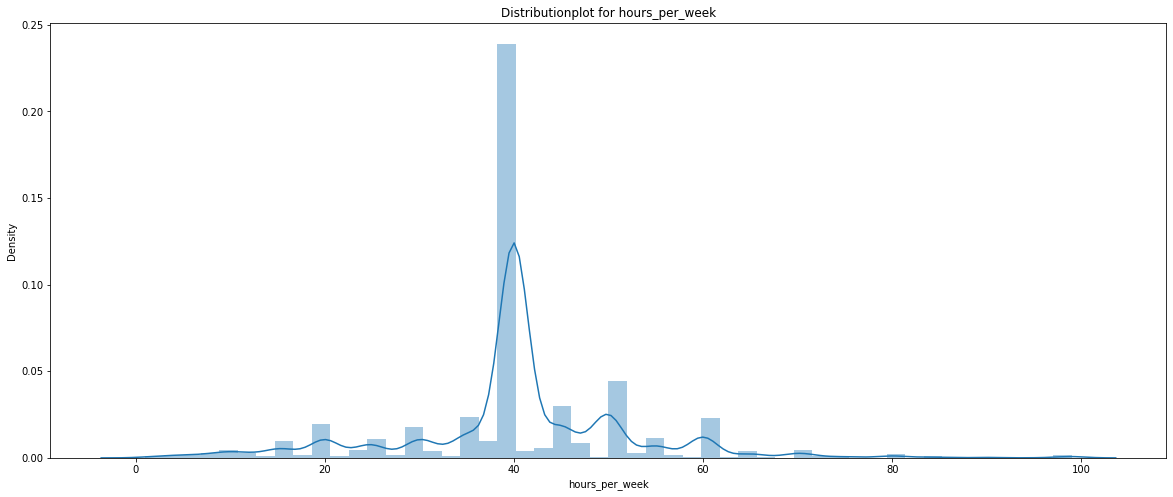

In [159]:
plt.figure(figsize = (20,8))
sns.distplot(df['hours_per_week'])
plt.title("Distributionplot for hours_per_week")
plt.show()

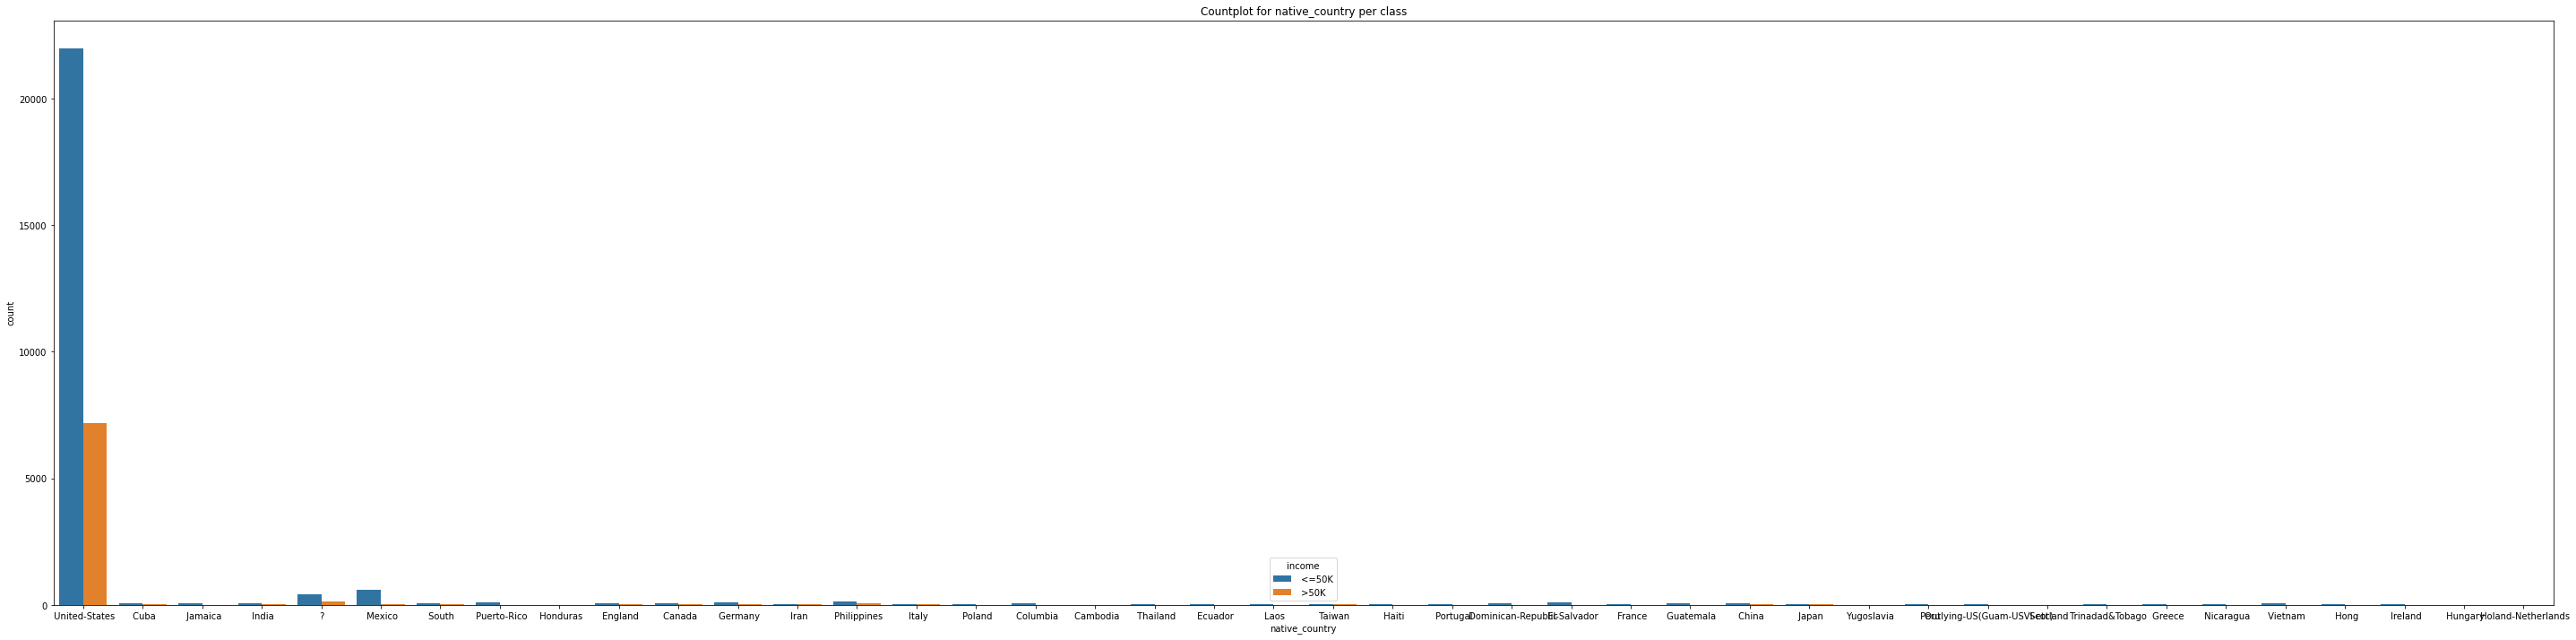

In [160]:
plt.figure(figsize = (50,12))
sns.countplot(x= 'native_country', hue = 'income', data=df)
plt.title("Countplot for native_country per class")
plt.show()

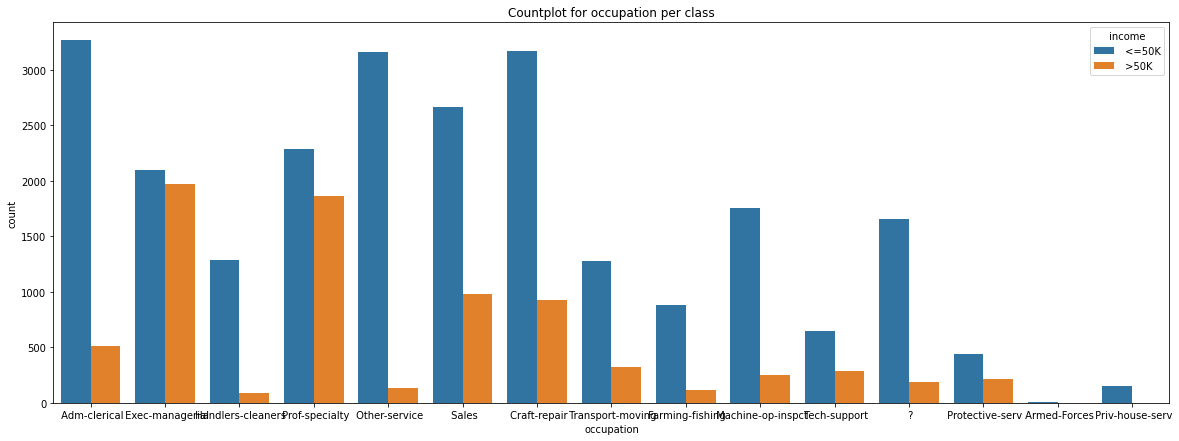

In [161]:
plt.figure(figsize = (20,7))
sns.countplot(x= 'occupation', hue = 'income', data=df)
plt.title("Countplot for occupation per class")
plt.show()

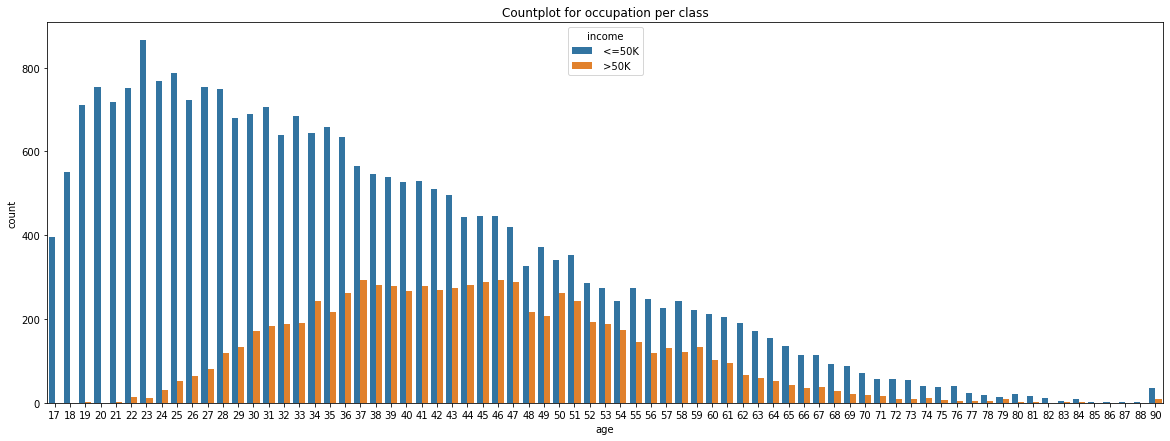

In [162]:
plt.figure(figsize = (20,7))
sns.countplot(x= 'age', hue = 'income', data=df)
plt.title("Countplot for occupation per class")
plt.show()

In [163]:
#converting categorical columns into numerical
for col in df.columns:
    if df[col].dtypes == 'object':
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(df[col])

In [164]:
X= df.iloc[:,0:14]
Y= df.iloc[:,-1]


Feature Selection

In [165]:
#apply SelectKBest class to extract top 10 best features

BestFeatures = SelectKBest(score_func=chi2, k=5)
fit = BestFeatures.fit(X,Y)

In [166]:
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)

#concatenating two dataframes 

f_Scores = pd.concat([df_columns,df_scores],axis=1)               
f_Scores.columns = ['Specs','Score'] 
f_Scores

,Specs,Score
0,age,8.600612e+03
1,workclass,4.750812e+01
2,fnlwgt,1.711477e+05
3,education,2.979423e+02
4,education_num,2.401422e+03
5,marital_status,1.123470e+03
6,occupation,5.045589e+02
7,relationship,3.659143e+03
8,race,3.303131e+01
9,sex,5.024394e+02


In [167]:
# print 10 best features in descending order
print(f_Scores.nlargest(10,'Score'))

             Specs         Score
10    capital_gain  8.219247e+07
11    capital_loss  1.372146e+06
2           fnlwgt  1.711477e+05
0              age  8.600612e+03
12  hours_per_week  6.476409e+03
7     relationship  3.659143e+03
4    education_num  2.401422e+03
5   marital_status  1.123470e+03
6       occupation  5.045589e+02
9              sex  5.024394e+02


In [168]:
#taking the feature to train the model
x = df[['capital_gain','capital_loss','fnlwgt','age', 'hours_per_week','relationship','education_num','marital_status','occupation','sex']]
y=df['income']
print(x)

       capital_gain  capital_loss  fnlwgt  age  hours_per_week  relationship  \
0              2174             0   77516   39              40             1   
1                 0             0   83311   50              13             0   
2                 0             0  215646   38              40             1   
3                 0             0  234721   53              40             0   
4                 0             0  338409   28              40             5   
...             ...           ...     ...  ...             ...           ...   
32556             0             0  257302   27              38             5   
32557             0             0  154374   40              40             0   
32558             0             0  151910   58              40             4   
32559             0             0  201490   22              20             3   
32560         15024             0  287927   52              40             5   

       education_num  marital_status  o

In [169]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64


Oversampling

In [170]:
# Oversampling
ros = RandomOverSampler(random_state=42)
ros.fit(x,y)

RandomOverSampler(random_state=42)

In [171]:
x_resampled, y_resampled  = ros.fit_resample(x,y)

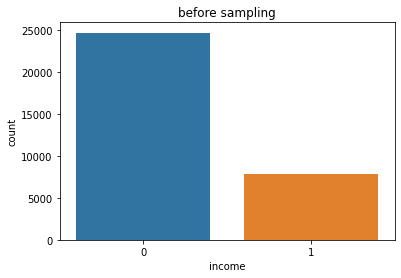

In [172]:
# plot before sampling
sns.countplot(df['income'])
plt.title("before sampling")
plt.show()


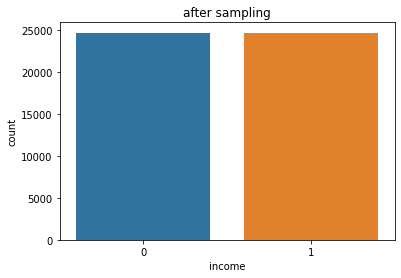

In [173]:
# plot after sampling
sns.countplot(y_resampled)
plt.title("after sampling")
plt.show()

In [174]:
#Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state= 8)
print(x.shape, x_train.shape, x_test.shape)

(32561, 10) (39552, 10) (9888, 10)


PCA


In [175]:
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.fit_transform(x_test)

Logistic Regression

In [176]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [177]:
#accuracy on training data
x_train_prediction = LR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = LR.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.7502528317152104
Accuracy on test data: 0.7554611650485437


In [178]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[4015 1437]
 [ 981 3455]]


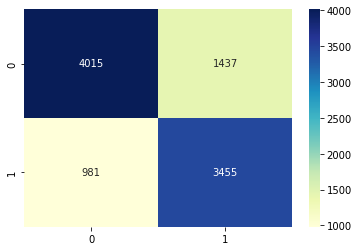

In [179]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [180]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      5452
           1       0.71      0.78      0.74      4436

    accuracy                           0.76      9888
   macro avg       0.75      0.76      0.75      9888
weighted avg       0.76      0.76      0.76      9888



In [181]:
#calculating the predicted probability for Logistic Regression
y_hat = LR.predict_proba(x_test)[:,1]

#defining thresold score
thresholds = np.linspace(0,1,100)

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
LR_roc_auc = roc_auc_score(y_test, LR.predict(x_test))
LR_roc_auc



0.754949012357883

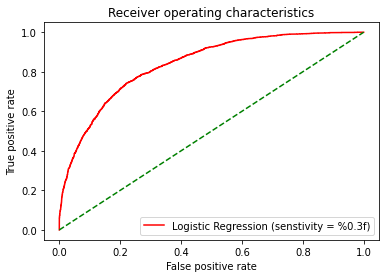

In [182]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (senstivity = %0.3f)',color='r' %LR_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")


In [183]:
# cross validation score
scores = cross_val_score(LR, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.74522148 0.742946   0.68727245]
0.73 accuracy with a standard deviation of 0.03


Naive Bayes

In [184]:
NB = GaussianNB()
NB.fit(x_train,y_train)

GaussianNB()

In [185]:
#accuracy on training data
x_train_prediction = LR.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = LR.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.7502528317152104
Accuracy on test data: 0.7554611650485437


In [186]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[4015 1437]
 [ 981 3455]]


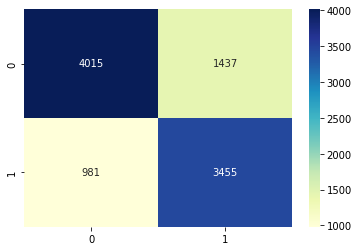

In [187]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [188]:
#calculating the predicted probability for Logistic Regression
y_hat = NB.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
NB_roc_auc = roc_auc_score(y_test, NB.predict(x_test))
NB_roc_auc


0.6321476641656744

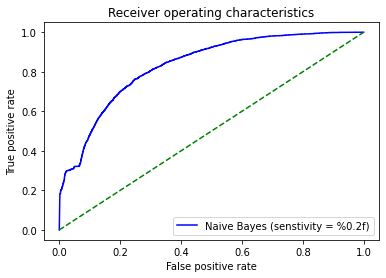

In [189]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (senstivity = %0.2f)',color='b' %NB_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [190]:
# cross validation score
scores = cross_val_score(NB, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.62507585 0.62598604 0.6254551 ]
0.63 accuracy with a standard deviation of 0.00


Decision Tree


In [191]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [192]:
#accuracy on training data
x_train_prediction = DT.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = DT.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9999494336569579
Accuracy on test data: 0.7503033980582524


In [193]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[4011 1484]
 [ 985 3408]]


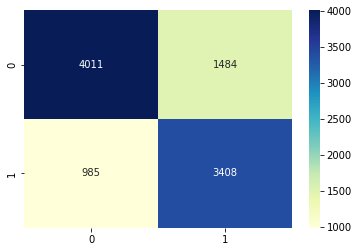

In [194]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [195]:
#calculating the predicted probability for Logistic Regression
y_hat = DT.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
DT_roc_auc = roc_auc_score(y_test, DT.predict(x_test))
DT_roc_auc

0.7497449308588325

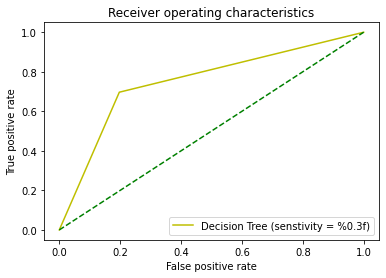

In [196]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (senstivity = %0.3f)',color='y' %NB_roc_auc)
plt.plot([0,1],[0,1], 'g--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [197]:
# cross validation score
scores = cross_val_score(DT, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.87985437 0.88493629 0.89085255]
0.89 accuracy with a standard deviation of 0.00


Random Forest

In [198]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [199]:
#accuracy on training data
x_train_prediction = RF.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = RF.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9999494336569579
Accuracy on test data: 0.8286812297734628


In [200]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[4569 1267]
 [ 427 3625]]


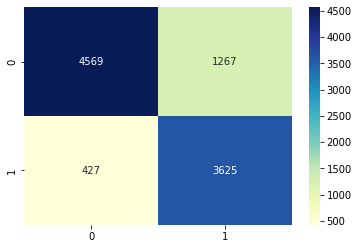

In [201]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [202]:
#calculating the predicted probability for Logistic Regression
y_hat = RF.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
RF_roc_auc = roc_auc_score(y_test, RF.predict(x_test))
RF_roc_auc

0.8277686744653288

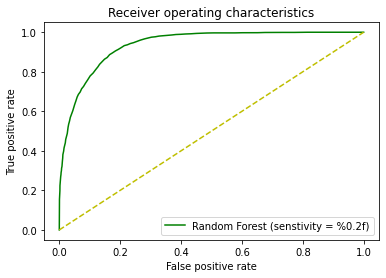

In [203]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (senstivity = %0.2f)',color='g' %RF_roc_auc)
plt.plot([0,1],[0,1], 'y--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [204]:
# cross validation score
scores = cross_val_score(RF, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.90526396 0.90928398 0.90943568]
0.91 accuracy with a standard deviation of 0.00


XGB

In [205]:
xgb = xgb.XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier()

In [206]:
#accuracy on training data
x_train_prediction = xgb.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = xgb.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.838061286407767
Accuracy on test data: 0.8311084142394822


In [207]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[3901  575]
 [1095 4317]]


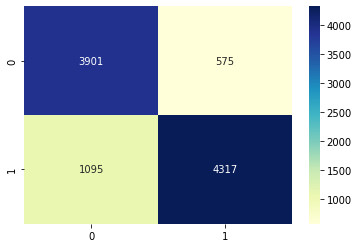

In [208]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [209]:
#calculating the predicted probability for XG boost
y_hat = xgb.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
xgb_roc_auc = roc_auc_score(y_test, xgb.predict(x_test))
xgb_roc_auc

0.8316429104035478

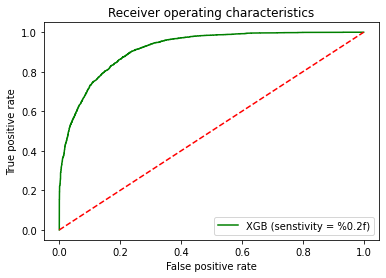

In [210]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='XGB (senstivity = %0.2f)',color='g' %RF_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [211]:
# cross validation score
scores = cross_val_score(xgb, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

cross-validation_scores:  [0.83351032 0.8365443  0.83222087]
0.83 accuracy with a standard deviation of 0.00


KNN

In [212]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [213]:
#accuracy on training data
x_train_prediction = knn.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = knn.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.8290604773462783
Accuracy on test data: 0.6023462783171522


In [214]:
#checking the confusion matrix
cm = confusion_matrix(x_test_prediction, y_test)
print(cm)

[[3242 2178]
 [1754 2714]]


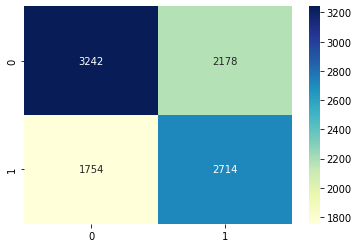

In [215]:
#plotting the confusion matrix
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')

In [216]:
#calculating the predicted probability for Logistic Regression
y_hat = knn.predict_proba(x_test)[:,1]

#defining fpr and tpr
fpr, tpr, thresold = roc_curve(y_test, y_hat)

#roc_auc_score
knn_roc_auc = roc_auc_score(y_test, knn.predict(x_test))
knn_roc_auc

0.6018512275069443

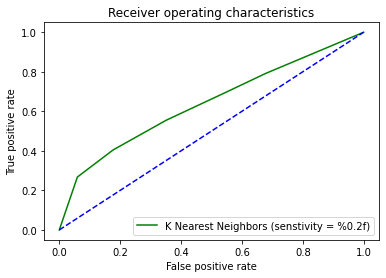

In [217]:
# plotting the roc curve
plt.figure()
plt.plot(fpr, tpr, label='K Nearest Neighbors (senstivity = %0.2f)',color='g' %knn_roc_auc)
plt.plot([0,1],[0,1], 'b--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title("Receiver operating characteristics")
plt.legend(loc="lower right")

In [218]:
# cross validation score
scores = cross_val_score(knn, x_train,y_train,cv=3)
print("cross-validation_scores: ",scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))


cross-validation_scores:  [0.69667779 0.69212682 0.69736044]
0.70 accuracy with a standard deviation of 0.00


Hyper Parameter Tuning

In [222]:
n_estimators = [int(x) for x in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(x) for x in np.linspace(40, 150, num=15)]

param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

RF_tuned = RandomForestClassifier(random_state=42)

RF_cv = RandomizedSearchCV(
    estimator=RF_tuned, param_distributions=param_dist, cv=5, random_state=42)

RF_cv.fit(x_train, y_train)



RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [223]:
RF_cv.best_score_

0.9179560409812003

In [224]:
RF_cv.best_params_

{'max_depth': 102, 'n_estimators': 40}

In [225]:
RF_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [226]:
RF_best.fit(x_train, y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [227]:
#accuracy on training data
x_train_prediction = RF_best.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
print('Accuracy on training data:',training_data_accuracy)

#Accuracy on test data
x_test_prediction = RF_best.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
print('Accuracy on test data:',test_data_accuracy)

Accuracy on training data: 0.9997724514563107
Accuracy on test data: 0.8242313915857605


In [228]:
#printing classification report precision, recall, f1-score   
print(classification_report(x_test_prediction, y_test))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84      5836
           1       0.74      0.89      0.81      4052

    accuracy                           0.82      9888
   macro avg       0.82      0.83      0.82      9888
weighted avg       0.84      0.82      0.83      9888

